1: What is a Support Vector Machine (SVM)?

    Ans:- SVM is a supervised learning algorithm used for classification and regression that finds an optimal hyperplane separating data points of different classes with the maximum margin.

2: What is the difference between Hard Margin and Soft Margin SVM?

    Ans:-
    - **Hard Margin:** No misclassification allowed, suitable only for perfectly separable data.

    - **Soft Margin:** Allows misclassification using slack variables, robust to noisy data.

3: What is the mathematical intuition behind SVM?

    Ans:- SVM maximizes the margin two classes by solving an optimization problem that minimizes ||w|| subject to correct classification constraints.

4: What is the role of Lagrange Multipliers in SVM?

    Ans:- They convert the constrained optimization problem into a dual problem, enabling kernel methods and identifying support vectors.

5: What are Support Vectors in SVM?

    Ans:- Support vectors are the data points closest to the decision boundary; they determine the position of the hyperplane.

6: What is a Support Vector Classifier (SVC)?

    Ans:- SVC is the classification version of SVM used to predict categorical class labels.

7: What is a Support Vector Regressor (SVR)?

    Ans:- SVR predicts continuous values while maintaining a margin of tolerance

8: What is the Kernel Trick in SVM?

    Ans:- The kernel trick allows SVMs to solve non-linear problems by implicitly mapping data into higher-dimensional space.

9: Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.

    Ans:-
    - **Linear:** Simple, fast, linearly separable data
    - **Polynomial:** Captures polynomial relationships
    - **RBF:** Handles complex, non-linear patterns

10: What is the effect of the C parameter in SVM?

    Ans:- Controls trade-off between margin width and classification error.

    - High C -> low bias, high variance
    - Low C -> high bias, low variance

11: What is the role of the Gamma parameter in RBF Kernel SVM?

    Ans:- Controls influence of a single data point.

    - High gamma -> overfitting
    - Low gamma -> underfitting

12: What is the Naïve Bayes classifier, and why is it called "Naïve"?

    Ans:- Naive Bayes is a probabilistic classifier based on Bayes' Theorem with the naive assumption of feature independence.

13: What is Bayes’ Theorem?

    Ans:- P(A∣B) =  P(B∣A) * P(A) / P(B)
	​

14: Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

    Ans:-
    - Gaussian: Continuous data
    - Multinomial: Text / count data
    - Bernoulli: Binary features

15: When should you use Gaussian Naïve Bayes over other variants?

    Ans:- When features are continuous and normally distributed

16: What are the key assumptions made by Naïve Bayes?

    Ans:-
    - Feature Independence
    - Equal importance of features

17: What are the advantages and disadvantages of Naïve Bayes?

    Ans:- Pros: Fast, works well with small data
          Cons: Independence assumption unrealistic

18: Why is Naïve Bayes a good choice for text classification?

    Ans:- Handles high-dimensional sparse data efficiently.

19: Compare SVM and Naïve Bayes for classification tasks.

    Ans:-
        | Aspect    | SVM    | Naïve Bayes |
        | --------- | ------ | ----------- |
        | Speed     | Slower | Faster      |
        | Accuracy  | Higher | Moderate    |
        | Data Size | Medium | Large       |

20: How does Laplace Smoothing help in Naïve Bayes?

    Ans:- Prevents zero probabilites by adding a small constant

21: Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

    Ans:-


In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.9473684210526315


22: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

In [3]:
from sklearn.datasets import load_wine

X,y = load_iris(return_X_y=True)

for kernel in ['linear', 'rbf']:
  model = SVC(kernel=kernel)
  model.fit(X,y)
  print(kernel, model.score(X,y))

linear 0.9933333333333333
rbf 0.9733333333333334



23: Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).

In [6]:
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

regressor = SVR()
X,y = fetch_california_housing(return_X_y=True)
regressor.fit(X,y)
y_pred = regressor.predict(X)
print(mean_squared_error(y,y_pred))

1.3536363080132137



24: Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
boundary.

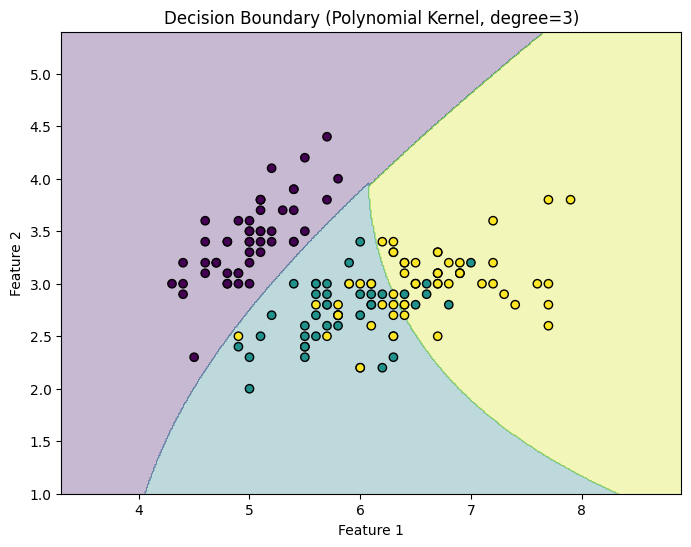

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Load dataset
iris = load_iris()
X = iris.data[:, :2]   # take only first two features
y = iris.target

# Train SVM with Polynomial Kernel
model = SVC(kernel="poly", degree=3, C=1)
model.fit(X, y)

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

# Predict over grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary (Polynomial Kernel, degree=3)")
plt.show()



25: Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
evaluate accuracy.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
X,y = load_breast_cancer(return_X_y=True)
model = GaussianNB()
model.fit(X,y)
print("Accuracy:", model.score(X,y))

Accuracy: 0.9420035149384886



26: Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
Newsgroups dataset.

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
data =  fetch_20newsgroups()
X = CountVectorizer().fit_transform(data.data)
model = MultinomialNB()
model.fit(X, data.target)


MultinomialNB()


27: Write a Python program to train an SVM Classifier with different C values and compare the decision
boundaries visually.

In [8]:
from sklearn.svm import SVC
# X = X.reshape(569, -1)
X = X.reshape(X.shape[0] // 20, -1)  # if you know the split factor
# X.shape = (569, n_features)
print(X.shape)
print(y.shape)

for c in [0.1, 1, 10]:
  model = SVC(C=c)
  model.fit(X,y)


28: Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
binary features.

In [9]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

X,y = make_classification(n_samples=500, n_features=10, random_state=42)
X = (X>0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.848



29: Write a Python program to apply feature scaling before training an SVM model and compare results with
unscaled data.

In [10]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X,y = load_iris(return_X_y=True)

svm1 = SVC()
svm1.fit(X_train, y_train)
print("Unscaled Accuracy:", svm1.score(X_test, y_test))

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

svm2 = SVC()
svm2.fit(X_train_s, y_train)
print("Scaled Accuracy:", svm2.score(X_test_s, y_test))

Unscaled Accuracy: 0.848
Scaled Accuracy: 0.848



30: Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
after Laplace Smoothing.

In [14]:
from sklearn.naive_bayes import GaussianNB

X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

model1 = GaussianNB(var_smoothing=1e-9)
model2 = GaussianNB(var_smoothing=1e-2)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

print("Before", accuracy_score(y_test, y_pred1))
print("After", accuracy_score(y_test, y_pred2))

Before 0.9300699300699301
After 0.8881118881118881



31: Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,gamma, kernel).

In [15]:
from sklearn.model_selection import GridSearchCV
X,y = load_iris(return_X_y=True)
model = SVC()
params = {
    'C': [0.1, 1, 2,4 ,5 , 10, 50 , 100],
    'gamma': [0.1, 0.2, 0.3, 0.001, 0.003],
    'kernel': ['linear', 'rbf']
}
grid = GridSearchCV(model,param_grid=params, cv=5, verbose=3)
grid.fit(X,y)
print("Best Parameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.2, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.2, kernel=linear


32: Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
check it improve accuracy.

In [1]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=1000, weights=[0.9,0.1], random_state=42)
X_train,X_test, y_train, y_test = train_test_split(X,y)

svm1 = SVC()
svm2 = SVC(class_weight="balanced")

svm1.fit(X_train, y_train)
svm2.fit(X_train, y_train)

print("Without class weight", accuracy_score(y_test, svm1.predict(X_test)))
print("With class weight", accuracy_score(y_test, svm2.predict(X_test)))


Without class weight 0.94
With class weight 0.936



33: Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = fetch_20newsgroups(categories=["rec.sport.baseball", "sci.space"])
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

X_train_vec = CountVectorizer().fit_transform(X_train)
X_test_vec = CountVectorizer().fit(data.data).transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

print("Accuracy: ", accuracy_score(y_test, model.predict(X_test_vec)))


ValueError: X has 21621 features, but MultinomialNB is expecting 18522 features as input.


34: Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
compare their accuracy.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

X,y = load_breast_cancer(return_X_y=True)

svm = SVC().fit(X,y)
nb = GaussianNB().fit(X,y)

print("SVM Accuracy: ", svm.score(X,y))
print("NB Accuracy: ", nb.score(X,y))


SVM Accuracy:  0.9226713532513181
NB Accuracy:  0.9420035149384886



35: Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
results.

In [6]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB

X, y = load_breast_cancer(return_X_y=True)
X = abs(X)

selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X,y)

model = MultinomialNB()
model.fit(X_new, y)
print("Accuracy after feature selection: ", model.score(X_new, y))

Accuracy after feature selection:  0.8945518453427065



36: Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
strategies on the Wine dataset and compare their accuracy.

In [7]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC

X,y = load_wine(return_X_y=True)

ovr = SVC(decision_function_shape='ovr').fit(X,y)
ovo = SVC(decision_function_shape='ovo').fit(X,y)

print("OvR Accuracy: ", ovr.score(X,y))
print("OvO Accuracy: ", ovo.score(X,y))

OvR Accuracy:  0.7078651685393258
OvO Accuracy:  0.7078651685393258



37: Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
Cancer dataset and compare their accuracy.

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

X,y = load_breast_cancer(return_X_y=True)

for k in ["linear", "poly", "rbf"]:
  model = SVC(kernel=k)
  model.fit(X,y)
  print(k, "Accuracy:", model.score(X,y))

linear Accuracy: 0.9666080843585237
poly Accuracy: 0.9138840070298769
rbf Accuracy: 0.9226713532513181



38: Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
average accuracy.

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score

X, y = load_iris(return_X_y=True)
skf = StratifiedKFold(n_splits=5)

scores = cross_val_score(SVC(), X, y , cv=skf)
print("Avg Accuracy: ", scores.mean())

Avg Accuracy:  0.9666666666666666


39: Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

In [12]:
X,y = load_breast_cancer(return_X_y=True)

model1 = GaussianNB(priors=[0.5, 0.5])
model2 = GaussianNB(priors=[0.7, 0.3])

model1.fit(X,y)
model2.fit(X,y)


print("Equal priors: ", model1.score(X,y))
print("Custom priors: ", model2.score(X,y))



Equal priors:  0.9437609841827768
Custom priors:  0.9402460456942003



40: Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

In [14]:
from sklearn.feature_selection import RFE

X,y = load_iris(return_X_y=True)

svm = SVC(kernel="linear")
rfe = RFE(svm, n_features_to_select=2)
X_new = rfe.fit_transform(X,y)

svm.fit(X_new, y)
print("Accuracy after RFE: ", svm.score(X_new, y))


Accuracy after RFE:  0.9666666666666667



41: Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy.

In [15]:
from sklearn.metrics import classification_report

X,y = load_breast_cancer(return_X_y=True)

model = SVC().fit(X,y)
y_pred = model.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       212
           1       0.90      0.98      0.94       357

    accuracy                           0.92       569
   macro avg       0.93      0.90      0.91       569
weighted avg       0.93      0.92      0.92       569




42: Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss
(Cross-Entropy Loss).

In [16]:
from sklearn.metrics import log_loss

model = GaussianNB().fit(X,y)
probs = model.predict_proba(X)
print("Log Loss: ", log_loss(y, probs))


Log Loss:  0.52040811078969



43: Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

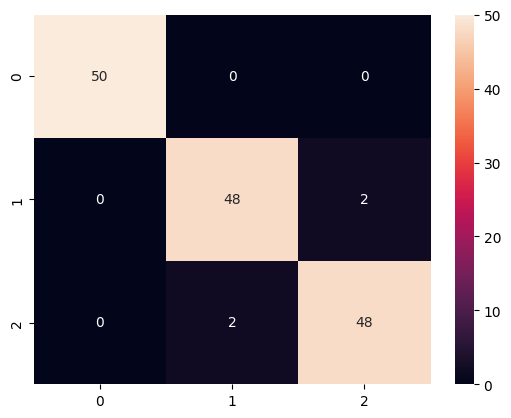

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X,y = load_iris(return_X_y=True)
y_pred = SVC().fit(X,y).predict(X)

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


44: Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE.

In [19]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

model = SVR().fit(X,y)

y_pred = model.predict(X)
print("MAE: ", mean_absolute_error(y, y_pred))

MAE:  0.13186372465856872



45: Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score.

In [20]:
from sklearn.metrics import roc_auc_score

X,y = load_breast_cancer(return_X_y=True)

model = GaussianNB().fit(X,y)
y_prob = model.predict_proba(X)[:,1]

print("ROC-AUC: ", roc_auc_score(y, y_prob))

ROC-AUC:  0.9890333491887321



46: Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

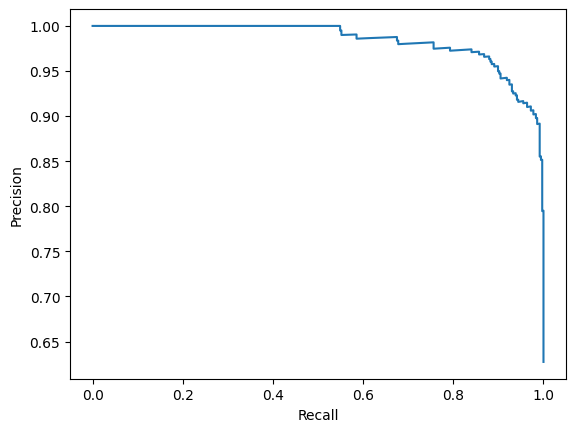

In [21]:
from sklearn.metrics import precision_recall_curve

model = SVC(probability=True).fit(X,y)
y_scores = model.predict_proba(X)[:,1]

precision, recall, _ = precision_recall_curve(y, y_scores)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()